In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [4]:
from quocca.camera import Camera
from quocca.plotting import show_img, show_circle

In [25]:
cam = Camera('adl')
img = cam.read('2024_02_19__23_31_07_7_1.fits')
img.add_catalog('hipparcos', max_mag=4.5, min_alt=20, min_dist=10.0, max_var=100)

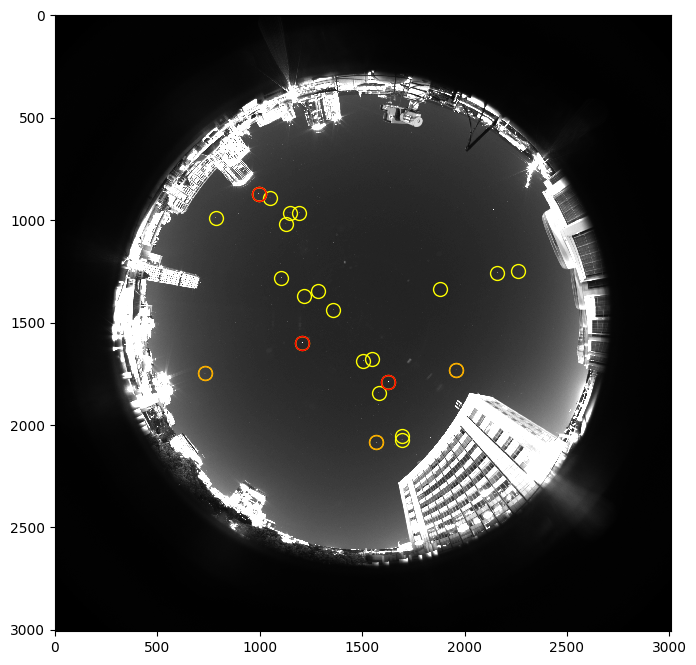

In [26]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img.image, vmin=0.0, vmax=np.percentile(img.image, 99.8),
               cmap='gray', interpolation='none')

ax = show_circle(img.stars.x, img.stars.y, img.stars.mag, ax=ax, max_mag=2.01, color='yellow', size=100)
ax = show_circle(img.stars.x, img.stars.y, img.stars.mag, ax=ax, max_mag=0.51, color='orange', size=100)
ax = show_circle(img.stars.x, img.stars.y, img.stars.mag, ax=ax, max_mag=0.01, color='r', size=100)

In [31]:
cam = Camera('adl')
img = cam.read('2024_02_19__23_31_07_7_1.fits')
img.add_catalog('hipparcos', max_mag=10, min_alt=0, min_dist=12.0, max_var=3)

res = img.detect('llh', fit_size=5)
res = res.merge(img.stars, on='id')

100%|████████████████████████████████████| 10568/10568 [00:45<00:00, 230.50it/s]


In [32]:
res

,id,M_fit,b_fit,x_fit,y_fit,success_fit,llh_fit,iter_fit,saturated,visibility,x,y,alt,az,mag,variability
0,45,1.188441e-19,0.246973,1470.696460,681.894444,1.0,0.006246,4.0,0.0,4.713970e+06,1470.696599,681.894233,24.194888,196.543465,9.59,NaN
1,52,1.074781e-19,0.231621,1414.740748,723.386790,1.0,0.013821,5.0,0.0,1.785324e+06,1414.739167,723.386958,27.275421,192.436491,8.56,NaN
2,55,7.165045e-03,0.272131,1538.628309,635.004267,1.0,0.005460,30.0,0.0,4.912938e+05,1538.264705,637.827673,20.548930,201.017875,7.40,NaN
3,57,4.350068e-03,0.257113,1504.294028,656.326686,1.0,0.006318,34.0,0.0,1.212052e+06,1501.263809,661.326686,22.546401,198.626484,8.27,1.0
4,66,2.426653e-03,0.246625,1470.985955,679.826061,1.0,0.006604,28.0,0.0,1.661121e+06,1469.494598,683.012835,24.282524,196.459130,8.55,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10563,117642,1.037165e-03,0.236399,1416.266395,709.475995,1.0,0.004967,51.0,0.0,1.750992e+06,1416.590456,712.790782,26.447882,192.632970,8.56,NaN
10564,117749,3.488920e-03,0.248135,1466.766650,677.742986,1.0,0.005642,35.0,0.0,6.031577e+05,1462.128165,678.157589,23.885461,195.956351,7.54,NaN
10565,117827,5.448504e-03,0.254975,1486.135456,660.212207,1.0,0.006090,35.0,0.0,1.049398e+06,1483.072268,664.111073,22.786141,197.397978,8.12,NaN
10566,117828,4.339074e-21,0.239169,1426.129194,707.436346,1.0,0.004397,5.0,0.0,7.295828e+06,1426.128784,707.436428,26.080145,193.341614,9.99,NaN


-1.2960000514984131 10.089899768829346 113


/Users/seinecke/opt/anaconda3/envs/asc/lib/python3.11/site-packages/pandas-2.3.1-py3.11-macosx-10.15-x86_64.egg/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


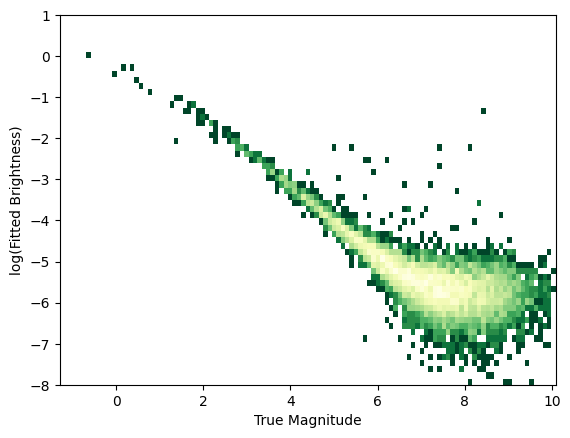

In [33]:
lowx = 0.9*res.mag.min()
upx = 1.01*res.mag.max()
binsx = int((upx-lowx)/0.1)
print(lowx, upx, binsx)

plt.hist2d(res['mag'], np.log(res['M_fit']), 
           norm=LogNorm(), range=((lowx,upx),(-8,1)), bins=(binsx,60), cmap='YlGn_r')
plt.xlabel('True Magnitude')
plt.ylabel('log(Fitted Brightness)')
plt.show()